In [1]:
#!pip install streamlit
import numpy as np
import pandas as pd
import random
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Clustering
from sklearn.cluster import KMeans
# conda install -c conda-forge scikit-learn-extra
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from operator import itemgetter

# Principal Components Analysis
from scipy import stats
from sklearn.decomposition import PCA

# Classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [5]:
# Import Data
df = pd.read_csv('dgn_raw_data.csv')

# Add very small random number to Rating
df['target']=df['Rating'].apply(lambda x: x+random.random()/1000)

df.head()

,UID,A1,A2,A3,A4,B1,B2,B3,B4,C1,C2,C3,C4,D1,D2,D3,D4,Rating,target
0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,100,100.000578
1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,100,100.000165
2,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0.000173
3,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0.000445
4,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0.000297


In [10]:
# Unique IDs
ids = df.UID.unique()

# Run linear regressions for each UID
op = pd.DataFrame
intercept = []
coefficients=[]
UID = []
for i in ids:
    df_i = df[df.UID == i]              # Create dataframe for current user id
    X = df_i.drop(['UID','Rating','target'], axis=1)  # df input variables only
    y = df_i['target']                  # Series of target variable
    reg = LinearRegression().fit(X, y)  # Fit linear regression
    reg.score(X, y)                     # Score regression model
    unique_id=df_i['UID'].unique()      # Saves current user id
    const = reg.intercept_              # Save intercept of the regression model
    coef = reg.coef_                    # Coefficients of regression model
    UID.append(unique_id)               # Append current user id
    intercept.append(const)             # Append current intercept
    coefficients.append(coef)           # Append current regression coefficients

# Convert newly created lists into dataframes
intercep_new = pd.DataFrame(intercept)
coefficients_new = pd.DataFrame(coefficients)
UID_new = pd.DataFrame(UID)

# Get columns names
colNames = df.drop(['Rating', 'target',], axis=1).columns
colNames = colNames.insert(1, 'Const')
colNames

# Concatenate the new dataframes and add column names
op = pd.concat([UID_new,intercep_new, coefficients_new], axis=1)
op.columns = colNames
op.head()

,UID,Const,A1,A2,A3,A4,B1,B2,B3,B4,C1,C2,C3,C4,D1,D2,D3,D4
0,1,65.557648,21.751240,-12.870817,0.538328,14.688452,44.407543,4.668714,-2.318459,-21.845710,-1.530816,-22.509360,-57.124896,-74.990727,26.501115,41.034387,51.224419,11.255936
1,2,-59.461038,86.040308,90.018514,74.390764,66.397149,1.826595,-33.026040,3.179363,-15.474926,-7.107611,19.450245,-44.596331,-10.819092,89.523687,83.428865,48.008322,93.440399
2,3,91.635241,67.703138,64.170270,15.395417,18.859900,-4.501589,4.677691,-57.286345,-20.365776,27.850796,-50.189554,-59.491354,-38.874564,6.687741,-59.896779,-52.236706,-31.524072
3,4,168.803491,-3.414352,-7.567828,-37.699199,-8.988856,-13.425420,-79.308883,-37.853757,-46.698658,-72.715165,-25.546303,-93.735637,-90.750080,-20.307302,1.256838,-15.608470,-32.250357
4,5,105.171614,-11.427332,-77.014795,-54.392287,-72.349024,21.058887,73.216708,19.827225,18.753345,5.367082,-83.649447,-32.425440,-1.291317,-27.986072,-42.094020,4.237533,-19.124818


In [11]:
op.shape

(100, 18)

### Linear Regression with A Variables

In [4]:
# Unique IDs
ids = df.UID.unique()

# Run linear regressions for each UID
op = pd.DataFrame
intercept = []
coefficients=[]
UID = []
for i in ids:
    df_i = df[df.UID == i]              # Create dataframe for current user id
    X = df_i.drop(['UID','B1', 'B2', 'B3', 'B4','C1', 'C2', 'C3', 'C4','D1', 'D2', 'D3', 'D4','Rating','target'], axis=1)  # df input variables only
    y = df_i['target']                  # Series of target variable
    reg = LinearRegression().fit(X, y)  # Fit linear regression
    reg.score(X, y)                     # Score regression model
    unique_id=df_i['UID'].unique()      # Saves current user id
    const = reg.intercept_              # Save intercept of the regression model
    coef = reg.coef_                    # Coefficients of regression model
    UID.append(unique_id)               # Append current user id
    intercept.append(const)             # Append current intercept
    coefficients.append(coef)           # Append current regression coefficients

# Convert newly created lists into dataframes
intercep_new = pd.DataFrame(intercept)
coefficients_new = pd.DataFrame(coefficients)
UID_new = pd.DataFrame(UID)

# Get columns names
colNames = df.drop(['B1', 'B2', 'B3', 'B4','C1', 'C2', 'C3', 'C4','D1', 'D2', 'D3', 'D4','Rating', 'target'], axis=1).columns
colNames = colNames.insert(1, 'Const')
colNames

# Concatenate the new dataframes and add column names
op = pd.concat([UID_new,intercep_new, coefficients_new], axis=1)
op.columns = colNames
op_A = op.iloc[:,2:6]

### Linear Regression with B Variables

In [5]:
# Unique IDs
ids = df.UID.unique()

# Run linear regressions for each UID
op = pd.DataFrame
intercept = []
coefficients=[]
UID = []
for i in ids:
    df_i = df[df.UID == i]              # Create dataframe for current user id
    X = df_i.drop(['UID','A1', 'A2', 'A3', 'A4','C1', 'C2', 'C3', 'C4','D1', 'D2', 'D3', 'D4','Rating','target'], axis=1)  # df input variables only
    y = df_i['target']                  # Series of target variable
    reg = LinearRegression().fit(X, y)  # Fit linear regression
    reg.score(X, y)                     # Score regression model
    unique_id=df_i['UID'].unique()      # Saves current user id
    const = reg.intercept_              # Save intercept of the regression model
    coef = reg.coef_                    # Coefficients of regression model
    UID.append(unique_id)               # Append current user id
    intercept.append(const)             # Append current intercept
    coefficients.append(coef)           # Append current regression coefficients

# Convert newly created lists into dataframes
intercep_new = pd.DataFrame(intercept)
coefficients_new = pd.DataFrame(coefficients)
UID_new = pd.DataFrame(UID)

# Get columns names
colNames = df.drop(['A1', 'A2', 'A3', 'A4','C1', 'C2', 'C3', 'C4','D1', 'D2', 'D3', 'D4','Rating', 'target'], axis=1).columns
colNames = colNames.insert(1, 'Const')
colNames

# Concatenate the new dataframes and add column names
op = pd.concat([UID_new,intercep_new, coefficients_new], axis=1)
op.columns = colNames
op_B = op.iloc[:,2:6]

### Linear Regression with C Variables

In [6]:
# Unique IDs
ids = df.UID.unique()

# Run linear regressions for each UID
op = pd.DataFrame
intercept = []
coefficients=[]
UID = []
for i in ids:
    df_i = df[df.UID == i]              # Create dataframe for current user id
    X = df_i.drop(['UID', 'A1', 'A2', 'A3', 'A4', 'B1', 'B2', 'B3', 'B4', 'D1', 'D2', 'D3', 'D4', 'Rating', 'target'], axis=1)  # df input variables only
    y = df_i['target']                  # Series of target variable
    reg = LinearRegression().fit(X, y)  # Fit linear regression
    reg.score(X, y)                     # Score regression model
    unique_id=df_i['UID'].unique()      # Saves current user id
    const = reg.intercept_              # Save intercept of the regression model
    coef = reg.coef_                    # Coefficients of regression model
    UID.append(unique_id)               # Append current user id
    intercept.append(const)             # Append current intercept
    coefficients.append(coef)           # Append current regression coefficients

# Convert newly created lists into dataframes
intercep_new = pd.DataFrame(intercept)
coefficients_new = pd.DataFrame(coefficients)
UID_new = pd.DataFrame(UID)

# Get columns names
colNames = df.drop(['A1', 'A2', 'A3', 'A4', 'B1', 'B2', 'B3', 'B4', 'D1', 'D2', 'D3', 'D4', 'Rating', 'target'], axis=1).columns
colNames = colNames.insert(1, 'Const')
colNames

# Concatenate the new dataframes and add column names
op = pd.concat([UID_new,intercep_new, coefficients_new], axis=1)
op.columns = colNames
op_C = op.iloc[:,2:6]

### Linear Regression with D Variables

In [7]:
# Unique IDs
ids = df.UID.unique()

# Run linear regressions for each UID
op = pd.DataFrame
intercept = []
coefficients=[]
UID = []
for i in ids:
    df_i = df[df.UID == i]              # Create dataframe for current user id
    X = df_i.drop(['UID', 'A1', 'A2', 'A3', 'A4', 'B1', 'B2', 'B3', 'B4', 'C1', 'C2', 'C3', 'C4', 'Rating', 'target'], axis=1)  # df input variables only
    y = df_i['target']                  # Series of target variable
    reg = LinearRegression().fit(X, y)  # Fit linear regression
    reg.score(X, y)                     # Score regression model
    unique_id=df_i['UID'].unique()      # Saves current user id
    const = reg.intercept_              # Save intercept of the regression model
    coef = reg.coef_                    # Coefficients of regression model
    UID.append(unique_id)               # Append current user id
    intercept.append(const)             # Append current intercept
    coefficients.append(coef)           # Append current regression coefficients

# Convert newly created lists into dataframes
intercep_new = pd.DataFrame(intercept)
coefficients_new = pd.DataFrame(coefficients)
UID_new = pd.DataFrame(UID)

# Get columns names
colNames = df.drop(['A1', 'A2', 'A3', 'A4', 'B1', 'B2', 'B3', 'B4', 'C1', 'C2', 'C3', 'C4', 'Rating', 'target'], axis=1).columns
colNames = colNames.insert(1, 'Const')
colNames

# Concatenate the new dataframes and add column names
op = pd.concat([UID_new,intercep_new, coefficients_new], axis=1)
op.columns = colNames
op_D = op.iloc[:,2:6]

### Replace 1's w/ Regression Coefficients in Original Data

In [8]:
# Concatenate regression dataframes
all_cfs = pd.concat([op_A, op_B, op_C, op_D], axis=1)

# Replace 1's w/ regression coefficients by column
cfs_cols = all_cfs.columns

for col in cfs_cols:
    for i in range(1,len(all_cfs)+1):
        df.loc[df['UID'] == i,[col]] = df.loc[df['UID'] == i,[col]].replace(1,all_cfs.loc[i-1,col])

df.head()

,UID,A1,A2,A3,A4,B1,B2,B3,B4,C1,C2,C3,C4,D1,D2,D3,D4,Rating,target
0,1,19.999773,0.000000,0.0,0.000000,0.0,0.0,0.000000,-16.666711,-19.999867,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,100,100.000555
1,1,19.999773,0.000000,0.0,0.000000,0.0,0.0,13.333227,0.000000,0.000000,0.000000,0.0,0.000000,-14.999893,0.000000,0.0,0.000000,100,100.000313
2,1,0.000000,0.000000,0.0,19.999699,0.0,0.0,0.000000,-16.666711,-19.999867,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0,0.000115
3,1,0.000000,-20.000369,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,-59.999899,0.000000,-14.999803,0.0,0.000000,0,0.000587
4,1,0.000000,-20.000369,0.0,0.000000,0.0,0.0,13.333227,0.000000,0.000000,-33.332992,0.0,0.000000,0.000000,0.000000,0.0,4.999964,0,0.000319


In [12]:
op.head()

,UID,Const,A1,A2,A3,A4,B1,B2,B3,B4,C1,C2,C3,C4,D1,D2,D3,D4
0,1,65.557648,21.751240,-12.870817,0.538328,14.688452,44.407543,4.668714,-2.318459,-21.845710,-1.530816,-22.509360,-57.124896,-74.990727,26.501115,41.034387,51.224419,11.255936
1,2,-59.461038,86.040308,90.018514,74.390764,66.397149,1.826595,-33.026040,3.179363,-15.474926,-7.107611,19.450245,-44.596331,-10.819092,89.523687,83.428865,48.008322,93.440399
2,3,91.635241,67.703138,64.170270,15.395417,18.859900,-4.501589,4.677691,-57.286345,-20.365776,27.850796,-50.189554,-59.491354,-38.874564,6.687741,-59.896779,-52.236706,-31.524072
3,4,168.803491,-3.414352,-7.567828,-37.699199,-8.988856,-13.425420,-79.308883,-37.853757,-46.698658,-72.715165,-25.546303,-93.735637,-90.750080,-20.307302,1.256838,-15.608470,-32.250357
4,5,105.171614,-11.427332,-77.014795,-54.392287,-72.349024,21.058887,73.216708,19.827225,18.753345,5.367082,-83.649447,-32.425440,-1.291317,-27.986072,-42.094020,4.237533,-19.124818


## PCA on Regression Coefficients

In [59]:
# Create PCA dataframe
df_fct = op.drop(['UID','Const'], axis=1)

# Standardize df_fct
# df_pca = stats.zscore(df_fct)  # Didn't need to worry about standardizing.
# Could build in a correlation/covariance PCA thing using ranges of the variables

# Create PCA object
pca = PCA(random_state=123)

# Get principal components
pca.fit(df_fct)

# Get scores
pca.transform(df_fct)

# Components needed
pcs_needed = len(np.where(pca.explained_variance_ >= 1)[0])

# Save scores for PCs w/ eignvalues >=1 as dataframe for clustering
scores = pd.DataFrame(pca.transform(df_fct))
scores = scores.iloc[:,0:pcs_needed]

In [70]:
# How many observations
n_samples = pca.components_.shape[0]

In [71]:
# Transpose the principal components
murph = pca.components_.T
# Center the data
murph -= np.mean(murph, axis=0)
# Compute the covariance matrix
cov_matrix = np.dot(murph.T, murph) / n_samples

In [72]:
for eigenvector in pca.components_:
    print(np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))

0.02160350938201331
0.0436041975039359
0.060999962634247756
0.06149240927184052
0.03707873782315121
0.05794701230207225
0.06145054044389531
0.0605399052235557
0.05854383973017073
0.06153837432566023
0.0568519672573749
0.06117489485720779
0.05603954915910648
0.05442983028908428
0.061730423218398
0.05997633011708643


In [75]:
n_samples = df_fct.shape[0]

pca = PCA(random_state=123)
X_transformed = pca.fit_transform(df_fct)

X_centered = df_fct - np.mean(df_fct, axis=0)
cov_matrix = np.dot(X_centered.T, X_centered) / n_samples
eigenvalues = pca.explained_variance_
for eigenvalue, eigenvector in zip(eigenvalues, pca.components_):
#     print(np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))
    print(eigenvalue)

4783.352366822385
3310.7357921862717
2076.6903778024307
1941.3935821323628
935.4581567078063
642.4898210682803
496.2315811073877
456.04814143294396
356.5002153319629
318.1571591231355
301.2393807460363
265.3142331630605
224.868275058128
164.3445789618197
149.69553062172784
92.06073062996411


In [78]:
pca.explained_variance_
# These are the eigenvalues of the covariance matrix
# They don't have values near 1-ish, so I need to understand why.

array([4783.35236682, 3310.73579219, 2076.6903778 , 1941.39358213,
        935.45815671,  642.48982107,  496.23158111,  456.04814143,
        356.50021533,  318.15715912,  301.23938075,  265.31423316,
        224.86827506,  164.34457896,  149.69553062,   92.06073063])

In [40]:
# Create PCA dataframe
df_fct = df.drop(['UID','Rating','target'], axis=1)

# Standardize df_fct
df_pca = stats.zscore(df_fct)  


# Create PCA object
pca = PCA(random_state=123)

# Get principal components
pca.fit(df_pca)

# Get scores
pca.transform(df_pca)

# Components needed
pcs_needed = len(np.where(pca.explained_variance_ >= 1)[0])

# Save scores for PCs w/ eignvalues >=1 as dataframe for clustering
scores = pd.DataFrame(pca.transform(df_pca))
scores = scores.iloc[:,0:pcs_needed]

In [26]:
scores

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,47.293320,32.445856,3.704980,-91.467041,24.388536,-51.651059,13.490490,-30.342484,13.126348,-14.827215,11.795694,0.683229,21.910244,27.330870,-12.597735,6.523995
1,185.935714,40.733230,-108.178194,-49.017977,11.775003,20.943945,28.142526,-24.390388,23.795311,36.299312,29.532358,19.401474,13.083187,-11.440046,4.494230,-7.518782
2,26.174068,97.949682,24.957955,49.776429,70.676362,18.281706,34.873954,-55.586078,-1.588578,-1.960693,-36.956058,-46.772308,11.324464,-9.441520,-10.189035,3.781486
3,-67.409122,145.710766,5.672713,-59.171488,9.230279,-17.601610,3.851775,-10.396532,54.333702,-6.465166,12.128920,20.140716,8.842697,16.714484,7.784397,5.342353
4,-75.619830,-41.232146,115.740715,-56.145349,56.518860,-15.974533,-18.672003,-2.448631,-44.413258,-0.260568,10.065922,-34.312405,0.092075,-19.560436,-20.908804,-2.431472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4.159451,-6.632089,0.308041,-1.366838,-3.336339,-0.692289,-4.105590,-3.055423,-0.116212,-2.096119,1.461266,-0.960995,0.951354,-0.381164,0.261534,2.115190
96,-27.703309,6.712586,45.057189,-5.599457,-17.650803,43.531221,70.129073,-5.662820,-44.198229,-7.171311,14.716240,10.248192,-3.888036,1.442078,-6.608902,-9.133149
97,-19.714290,-2.409653,-50.931290,33.353309,-10.754573,-5.757351,4.500433,2.813067,15.038971,-7.203788,3.005198,-11.178808,-7.568368,8.007005,-2.405724,5.154619
98,-126.824432,3.564134,-72.336587,86.960136,57.213611,34.122191,-34.352127,-40.342842,-37.136507,0.900110,24.766362,-42.762855,-4.895579,36.346579,0.856288,-8.463361


In [ ]:
# !pip install pca

In [15]:
from pca import pca

In [18]:
model = pca(n_components=4)
results = model.fit_transform(df_pca)

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed on the [16] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


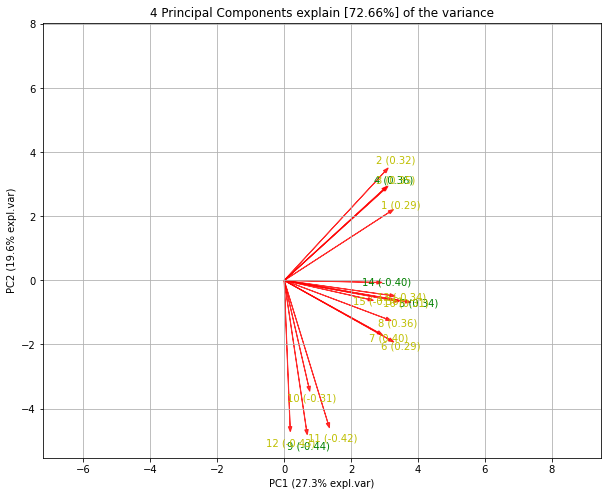

In [19]:
# Correlation PCA
fig, ax = model.biplot(n_feat=16, cmap=None, label=False, legend=False)

In [20]:
model2 = pca(n_components=4)
results2 = model2.fit_transform(df_fct)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [16] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


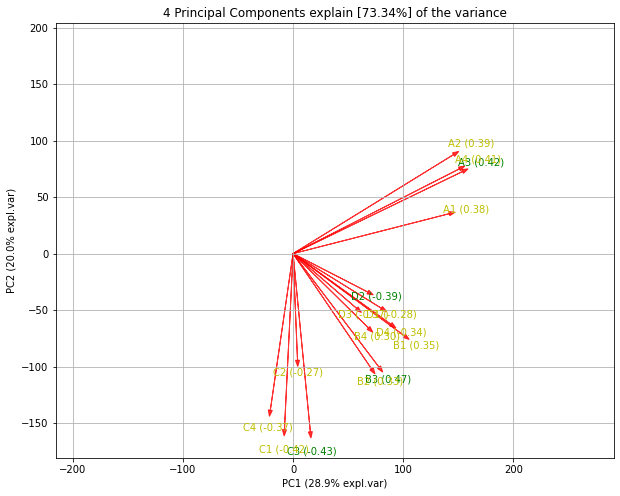

In [21]:
# Covariance PCA
fig, ax = model2.biplot(n_feat=16, cmap=None, label=False, legend=False)

I'm not sure if PCA makes sense here.  We have sparse data, and if we do use PCA, we may need to do correlation PCA because the values vary significantly.  The different variables might have similar distributions though.

## Cluster on Regression Coefficients


**Cluster using PCA scores**
1. Find optimal 2-cluster solution
1. Add the optimal solution to df_fct
1. Repeat for 3-6 clusters


In [34]:
for i in range(2,7):
    
    sw = []
    
    # Create clustering objects
    cls1 = KMeans(n_clusters=i, random_state=0)
    cls2 = KMedoids(n_clusters=i, random_state=0)
    cls3 = AgglomerativeClustering(n_clusters=i, affinity = 'euclidean', linkage ='ward')
        # Note on agglomerative clustering: if linkage is ward, affinity must be Euclidean
    cls_algs = [['kMeans', cls1], ['kMedoids', cls2], ['Hierarchical', cls3]]
    
    # Fit and score clustering solutions for i clusters with each clustering algorithm
    for cls in cls_algs:
        
        # Fit the model to the factor analysis scores
        cls[1].fit(scores)
        
        # List of assigned clusters
        clusters = cls[1].fit_predict(scores)
        
        # Silhouette scores for each solution
        silhouette_avg = silhouette_score(scores,clusters)
        
        # Store solution info [algorithm, number of clusters, avg silhouette score, cluster predictions]
        algorithm = cls[0]
        i_stats = [algorithm, i, silhouette_avg, clusters]
        sw.append(i_stats)
        
        # Add columns of cluster assignments to df_fct datafram
        ### This should be modified to only add the optimal solution for that number of clusters
#         df_fct[algorithm+'_'+'cluster'+'_'+str(i)] = clusters


    # Reorder cluster lists by descending silhouette scores.  Clusters in first element should be assigned to training data.
    sw = sorted(sw, key=itemgetter(2), reverse=True)
    df_fct[f'Optimal {sw[0][1]} cluster solution ({sw[0][0]})'] = sw[0][3]

# Add the labels to the training dataset (you can ignore the warning when the cell runs)
# df_fct['cluster'] = sw[0][3]

In [35]:
df_fct.head()

,A1,A2,A3,A4,B1,B2,B3,B4,C1,C2,...,C4,D1,D2,D3,D4,Optimal 2 cluster solution (kMeans),Optimal 3 cluster solution (kMeans),Optimal 4 cluster solution (kMeans),Optimal 5 cluster solution (kMeans),Optimal 6 cluster solution (kMeans)
0,21.751240,-12.870817,0.538328,14.688452,44.407543,4.668714,-2.318459,-21.845710,-1.530816,-22.509360,...,-74.990727,26.501115,41.034387,51.224419,11.255936,0,2,1,4,4
1,86.040308,90.018514,74.390764,66.397149,1.826595,-33.026040,3.179363,-15.474926,-7.107611,19.450245,...,-10.819092,89.523687,83.428865,48.008322,93.440399,0,0,3,3,3
2,67.703138,64.170270,15.395417,18.859900,-4.501589,4.677691,-57.286345,-20.365776,27.850796,-50.189554,...,-38.874564,6.687741,-59.896779,-52.236706,-31.524072,1,1,0,1,1
3,-3.414352,-7.567828,-37.699199,-8.988856,-13.425420,-79.308883,-37.853757,-46.698658,-72.715165,-25.546303,...,-90.750080,-20.307302,1.256838,-15.608470,-32.250357,1,1,0,2,2
4,-11.427332,-77.014795,-54.392287,-72.349024,21.058887,73.216708,19.827225,18.753345,5.367082,-83.649447,...,-1.291317,-27.986072,-42.094020,4.237533,-19.124818,0,2,1,0,0


In [36]:
df_2cl = df_fct.iloc[:,np.r_[0:16,16]]  # The last number here is the cluster solution

In [37]:
df_2cl.head()

,A1,A2,A3,A4,B1,B2,B3,B4,C1,C2,C3,C4,D1,D2,D3,D4,Optimal 2 cluster solution (kMeans)
0,21.751240,-12.870817,0.538328,14.688452,44.407543,4.668714,-2.318459,-21.845710,-1.530816,-22.509360,-57.124896,-74.990727,26.501115,41.034387,51.224419,11.255936,0
1,86.040308,90.018514,74.390764,66.397149,1.826595,-33.026040,3.179363,-15.474926,-7.107611,19.450245,-44.596331,-10.819092,89.523687,83.428865,48.008322,93.440399,0
2,67.703138,64.170270,15.395417,18.859900,-4.501589,4.677691,-57.286345,-20.365776,27.850796,-50.189554,-59.491354,-38.874564,6.687741,-59.896779,-52.236706,-31.524072,1
3,-3.414352,-7.567828,-37.699199,-8.988856,-13.425420,-79.308883,-37.853757,-46.698658,-72.715165,-25.546303,-93.735637,-90.750080,-20.307302,1.256838,-15.608470,-32.250357,1
4,-11.427332,-77.014795,-54.392287,-72.349024,21.058887,73.216708,19.827225,18.753345,5.367082,-83.649447,-32.425440,-1.291317,-27.986072,-42.094020,4.237533,-19.124818,0


In [38]:
# Split data into 75% training, 12.5% validation, 12.5% test
train, valid = train_test_split(df_2cl, test_size=0.30, random_state=123)

# X is unlabeled training data, y is true training labels 
X, y = train.iloc[:,0:-1], train.iloc[:,-1]

X_valid, y_valid = valid.iloc[:,0:-1], valid.iloc[:,-1]

In [39]:
clf_scores = []

clf1 = RandomForestClassifier(random_state=0)
clf2 = GradientBoostingClassifier(random_state=0)
clf3 = SVC(random_state=0)
clf4 = KNeighborsClassifier()

classifiers = [['rf', clf1], ['gbt', clf2], ['svc', clf3], ['knn', clf4]]

for classifier in classifiers:
    
    # Fit classifier to training data
    classifier[1].fit(X,y)    
    
    # Store classifier-specific results [algorithm object, classifier name, scores]
    results = [classifier[1], classifier[0], classifier[1].score(X_valid,y_valid)]

    # Overall classifier results
    clf_scores.append(results)

# Sort classifier accuracy in descending order
clf_scores = sorted(clf_scores, key=itemgetter(2), reverse=True)

In [40]:
clf1.feature_importances_

array([0.01244902, 0.0305185 , 0.00971647, 0.00748856, 0.14920253,
       0.15059174, 0.18565703, 0.15138008, 0.02848779, 0.05361704,
       0.06713718, 0.05008711, 0.02266598, 0.04684152, 0.02220905,
       0.0119504 ])

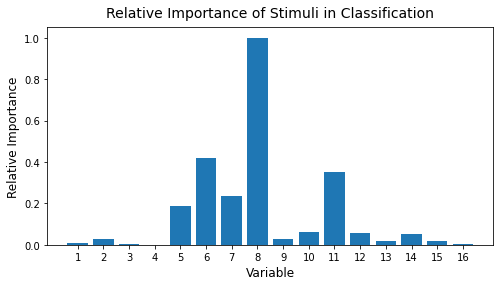

In [41]:
importance = pd.DataFrame({'variable': list(range(1,len(clf1.feature_importances_)+1)),
                           'rf': clf1.feature_importances_,
                           'gbt': clf2.feature_importances_,})

# Average variable importance of rf and gbt models
importance['avg'] = (importance['rf']+importance['gbt'])/2

# Put the average importances on a scale from 0 to 1 to make it easier to visualize
importance['Relative Importance'] = np.interp(importance['avg'], (importance['avg'].min(), importance['avg'].max()), (0, 1))

# View top 10 variables when RF and GBT models are averaged
top_10_avg = importance.sort_values(by='avg', ascending=False)[['avg', 'Relative Importance']].head(10)

# 7 out of 10 of the top variables appear in both lists

# Add variable rank column to dataframe
importance_rank = list(range(1,len(clf1.feature_importances_)+1))
importance = importance.sort_values(by='Relative Importance', ascending=False)
importance['rank'] = importance_rank
importance.reset_index(inplace=True)

# Visualize relative importance of stimuli
fig, ax = plt.subplots(figsize=(8,4))

ax.bar(x=importance.variable, height=importance['Relative Importance'], tick_label=importance.variable)
plt.xlabel("Variable", fontsize=12)
plt.ylabel("Relative Importance", fontsize=12)
plt.title("Relative Importance of Stimuli in Classification", fontsize=14, pad=10)
plt.savefig('Images/relative_importance.png')
plt.show()

In [42]:
# The variable importance is saved as the index so it can be easily converted to the column name later
top_5 = importance[importance['rank'] <= 5]['index']

In [43]:
top_5

0     7
1     5
2    10
3     6
4     4
Name: index, dtype: int64

In [44]:
# Convert X to all 1 and -1
X = X.mask(df > 0, other=1, inplace=False).mask(df <= 0, other=-1, inplace=False)
X_valid = X_valid.mask(df > 0, other=1, inplace=False).mask(df <= 0, other=-1, inplace=False)

In [45]:
X.head()

,A1,A2,A3,A4,B1,B2,B3,B4,C1,C2,C3,C4,D1,D2,D3,D4
21,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
90,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0
33,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0
69,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0
84,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0


In [46]:
X.iloc[:,top_5[0:2]]

,B4,B2
21,-1.0,1.0
90,-1.0,1.0
33,-1.0,1.0
69,-1.0,1.0
84,-1.0,-1.0
...,...,...
57,-1.0,-1.0
83,-1.0,-1.0
17,-1.0,-1.0
92,1.0,-1.0


In [47]:
# Retrain on the 2-6 most important variables

for i in range(2,3):  # This is currently set to only work for a single round

    clf_scores = []

    clf1 = RandomForestClassifier(random_state=0)
    clf2 = GradientBoostingClassifier(random_state=0)
    clf3 = SVC(random_state=0)
    clf4 = KNeighborsClassifier()

    classifiers = [['rf', clf1], ['gbt', clf2], ['svc', clf3], ['knn', clf4]]

    for classifier in classifiers:

        # Fit classifier to training data
        classifier[1].fit(X.iloc[:,np.r_[top_5[0:i]]],y)    

        # Store classifier-specific results [algorithm object, classifier name, scores]
        results = [classifier[1], classifier[0], classifier[1].score(X_valid.iloc[:,np.r_[top_5[0:i]]],y_valid)]

        # Overall classifier results
        clf_scores.append(results)

    # Sort classifier accuracy in descending order
    clf_scores = sorted(clf_scores, key=itemgetter(2), reverse=True)

In [48]:
clf_scores

[[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                         criterion='gini', max_depth=None, max_features='auto',
                         max_leaf_nodes=None, max_samples=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estimators=100,
                         n_jobs=None, oob_score=False, random_state=0, verbose=0,
                         warm_start=False),
  'rf',
  0.7333333333333333],
 [GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                             learning_rate=0.1, loss='deviance', max_depth=3,
                             max_features=None, max_leaf_nodes=None,
                             min_impurity_decrease=0.0, min_impurity_split=None,
                             min_samples_leaf=1, min_samples_split=2,
                             

In [49]:
X_valid.iloc[:,np.r_[top_5[0:i]]].head()

,B4,B2
8,-1.0,-1.0
70,-1.0,-1.0
82,-1.0,1.0
28,-1.0,-1.0
63,-1.0,-1.0


In [150]:
y_valid.head()

1017    0
2150    0
167     0
1707    0
2233    0
Name: Optimal 2 cluster solution (Hierarchical), dtype: int64

In [146]:
# I need to create a new dataset for each clustering solution
# I could create a separate dataframe of clustering solutions, each with the original variables and 1 clustering solution
# Then I split the first dataset
# Then I run it through the classifier loop
# I get the variable importance
# Save the top 5 variables
# Train the classifier on the top 2 variables

# 2 clusters, 2 variables
# Every 1,1 combination needs to be classified the same
# Every 1,-1 combination needs to be classified the same

# Use a NumPy meshgrid to map out all possible 1,-1 combinations
# Should end up with 25 different maps (5 cluster solutions with 5 variables)


In [ ]:
# This is for making the letter-based regression dynamic

# Create a list of unique first letters of variables
X = df.drop(['UID','Rating','target'], axis=1)
y = df["target"]

var_letters = []

for i in X.columns:
    var_letters.append(i[0:1])  # Append first character

var_letters = list(np.unique(var_letters))  # List of unique variable letters



<b>Scenario Analysis</b>

In [46]:
df.head()

,UID,A1,A2,A3,A4,B1,B2,B3,B4,C1,C2,C3,C4,D1,D2,D3,D4,Rating,target
0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,100,100.000507
1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,100,100.000668
2,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0.000386
3,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0.000067
4,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0.000382


In [19]:
# np.where(condition, value if condition is true, value if condition is false)

# create a list of the column categories

cat_A = ['A1', 'A2', 'A3', 'A4']
cat_B = ['B1', 'B2', 'B3', 'B4']
cat_C = ['C1', 'C2', 'C3', 'C4']
cat_D = ['D1', 'D2', 'D3', 'D4']

# create a list of our conditions
cat_A_conditions = [
    (df['A1'] == 1),
    (df['A2'] == 1),
    (df['A3'] == 1),
    (df['A4'] == 1),
    (df['A1']==0) & (df['A2']==0) & (df['A3']==0) & (df['A4']==0),
    ]

cat_B_conditions = [    
    (df['B1'] == 1),
    (df['B2'] == 1),
    (df['B3'] == 1),
    (df['B4'] == 1),
    (df['B1']==0) & (df['B2']==0) & (df['B3']==0) & (df['B4']==0),
    ]    

cat_C_conditions = [    
    (df['C1'] == 1),
    (df['C2'] == 1),
    (df['C3'] == 1),
    (df['C4'] == 1),
    (df['C1']==0) & (df['C2']==0) & (df['C3']==0) & (df['C4']==0),
    ]

cat_D_conditions = [    
    (df['D1'] == 1),
    (df['D2'] == 1),
    (df['D3'] == 1),
    (df['D4'] == 1),  
    (df['D1']==0) & (df['D2']==0) & (df['D3']==0) & (df['D4']==0),
    ]

# create a list of the values we want to assign for each condition
cat_A_values = ['A1', 'A2', 'A3', 'A4', 'A0']
cat_B_values = ['B1', 'B2', 'B3', 'B4','B0']
cat_C_values = ['C1', 'C2', 'C3', 'C4','C0']
cat_D_values = ['D1', 'D2', 'D3', 'D4','D0']
    
df['cat_A_scenario'] = np.select(cat_A_conditions, cat_A_values)
df['cat_B_scenario'] = np.select(cat_B_conditions, cat_B_values)
df['cat_C_scenario'] = np.select(cat_C_conditions, cat_C_values)
df['cat_D_scenario'] = np.select(cat_D_conditions, cat_D_values)

<b> Example of Scenario where Variable A1 has a 1 </b>

In [20]:
cat_A = df['cat_A_scenario'].unique()
# list of independant variables for regression
fields = df.columns[1:17]
dep_var = df['noise']

In [21]:
df_A1 = df[df['cat_A_scenario']=='A1']
df_A1

,UID,A1,A2,A3,A4,B1,B2,B3,B4,C1,...,D1,D2,D3,D4,Rating,noise,cat_A_scenario,cat_B_scenario,cat_C_scenario,cat_D_scenario
0,1,1,0,0,0,0,0,0,1,1,...,0,0,0,0,100,100.000893,A1,B4,C1,D0
1,1,1,0,0,0,0,0,1,0,0,...,1,0,0,0,100,100.000783,A1,B3,C0,D1
13,1,1,0,0,0,0,0,0,0,1,...,0,0,0,1,100,100.000825,A1,B0,C1,D4
16,1,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0.000479,A1,B4,C4,D3
17,1,1,0,0,0,1,0,0,0,0,...,0,0,0,1,100,100.000252,A1,B1,C3,D4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2383,100,1,0,0,0,0,0,0,1,0,...,0,0,0,1,5,5.000552,A1,B4,C0,D4
2385,100,1,0,0,0,0,0,1,0,0,...,0,0,1,0,5,5.000693,A1,B3,C2,D3
2393,100,1,0,0,0,0,0,0,1,0,...,0,1,0,0,5,5.000722,A1,B4,C4,D2
2398,100,1,0,0,0,1,0,0,0,0,...,0,0,0,0,5,5.000264,A1,B1,C4,D0


In [24]:
X =df_A1[['B1', 'B2', 'B3', 'B4','C1', 'C2', 'C3', 'C4','D1', 'D2', 'D3', 'D4']]
y= df_A1['noise']
reg = LinearRegression().fit(X, y)
reg.score(X, y)
const = reg.intercept_
coef = reg.coef_
print(const)
print(coef)

33.91035518762444
[ -3.84235504 -13.45891789  -5.98115784  -1.00151876  -5.2084735
  -0.95495595  -3.15645822  -7.2888877   -2.32297686  -3.7339574
  -5.08132817   1.23153583]


In [23]:
# scratch pad, not finished
for i in cat_A:
    df_i = df[df.cat_A_scenario == i]
    X =df_i[df_i.columns[1:17]]
    y= df_i['noise']
    reg = LinearRegression().fit(X, y)
    reg.score(X, y)
    const = reg.intercept_
    coef = reg.coef_
    intercept.append(const)
    coefficients.append(coef)
#print(UID)    
intercep_new = pd.DataFrame(intercept)
coefficients_new = pd.DataFrame(coefficients)